In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

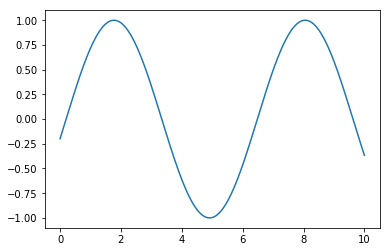

In [2]:
x = np.linspace(0, 10, 1000)
graph = plt.plot(x, np.sin(x-0.2))[0]

In [3]:
import matplotlib.animation as animation
animation.FuncAnimation?

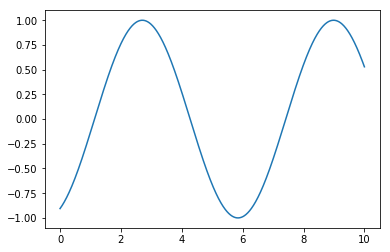

In [4]:
import matplotlib.animation as animation
fig = plt.gcf()
x = np.linspace(0, 10, 1000)
graph = plt.plot(x, np.sin(x))[0]
def anim_func(num): 
    graph.set_data((x, np.sin(x+num) ))
    return graph,
anim = animation.FuncAnimation(fig, anim_func, 25, interval=1000, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

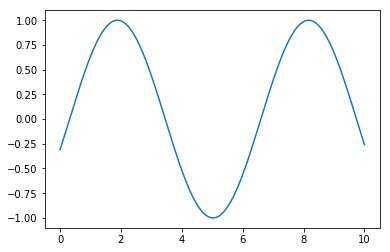

In [8]:
import matplotlib.animation as animation
fig = plt.gcf()
x = np.linspace(0, 10, 1000)
graph = plt.plot(x, np.sin(x))[0]
def anim_func(num): 
    graph.set_data((x, np.sin(x+num *2*np.pi /20) ))
    return graph,
anim = animation.FuncAnimation(fig, anim_func, 200, interval=50, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

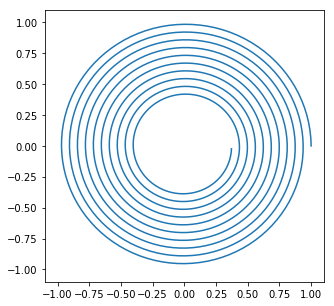

In [20]:
import matplotlib.animation as animation
fig = plt.figure(figsize=(5,5))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
x = np.linspace(0, 20*np.pi, 1000)
circle_data = np.array([(1-x/100)*np.cos(x), (1-x/100)*np.sin(x)])
graph = plt.plot(circle_data[0][:30], circle_data[1][:30])[0]

def anim_func(num): 
    graph.set_data(circle_data[:, :num])
    return graph,
anim = animation.FuncAnimation(fig, anim_func, 1000, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

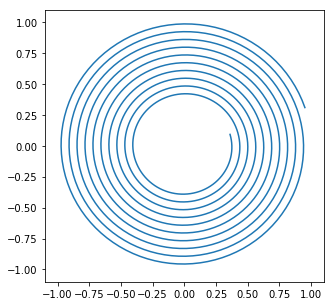

In [22]:
import matplotlib.animation as animation
fig = plt.figure(figsize=(5,5))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
x = np.linspace(0, 20*np.pi, 1000)
circle_data = np.array([(1-x/100)*np.cos(x), (1-x/100)*np.sin(x)])
graph = plt.plot(circle_data[0][:30], circle_data[1][:30])[0]

def anim_func(num): 
    s = num/20
    circle_data = np.array([(1-x/100)*np.cos(x-s), (1-x/100)*np.sin(x-s)])
    graph.set_data(circle_data[:, :num])
    return graph,
anim = animation.FuncAnimation(fig, anim_func, 1000, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


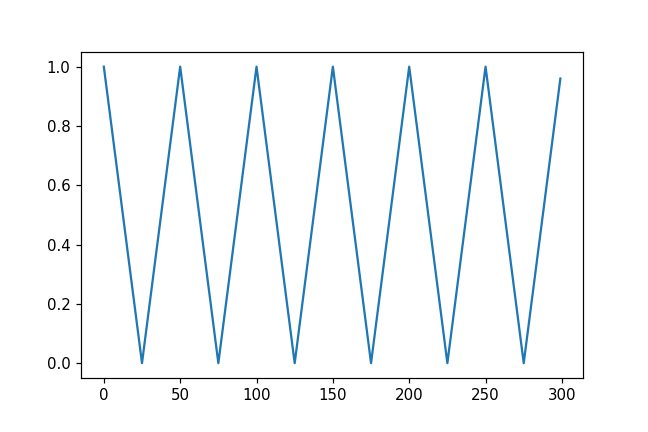

In [32]:
x = np.arange(0, 300)
plt.plot(x,  abs((x%50)/50-0.5)*2 )

<IPython.core.display.Javascript object>


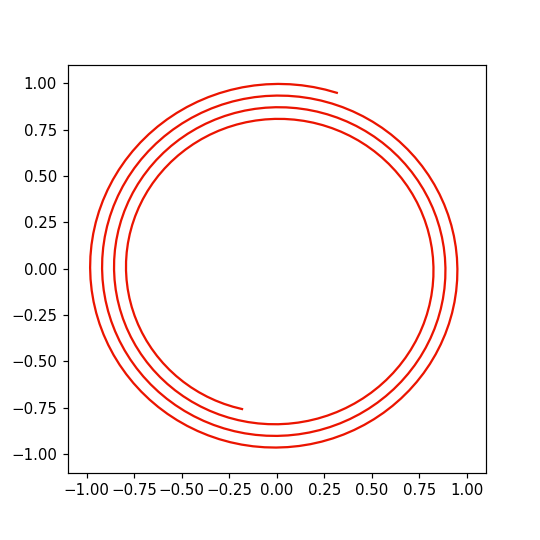

In [33]:
import matplotlib.animation as animation
fig = plt.figure(figsize=(5,5))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
x = np.linspace(0, 20*np.pi, 1000)
circle_data = np.array([(1-x/100)*np.cos(x), (1-x/100)*np.sin(x)])
graph = plt.plot(circle_data[0][:30], circle_data[1][:30])[0]

def anim_func(num): 
    s = num/20
    circle_data = np.array([(1-x/100)*np.cos(x-s), (1-x/100)*np.sin(x-s)])
    graph.set_data(circle_data[:, :num])
    r = abs((num%50)/50-0.5)*2
    graph.set_color((r, 1-r, 0))
    return graph,
anim =  animation.FuncAnimation(fig, anim_func, 1000, interval=20, blit=True)


In [ ]:
def anim_func(num): 
    graph.set_data((x, np.sin(x+num *2*np.pi /20) ))
    return graph,
anim = animation.FuncAnimation(fig, anim_func, 200, interval=50, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

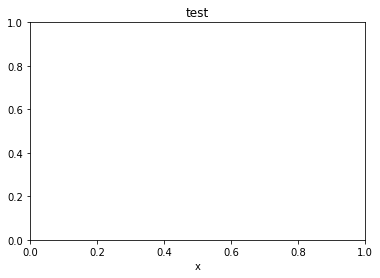

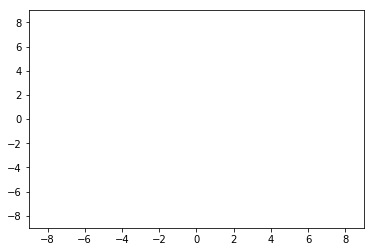

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)



In [4]:
from IPython.display import Video

In [15]:
im_ani.save('im_ani.mp4')

In [11]:
Video("im_ani.mp4")

In [16]:
from IPython.display import display
from ipywidgets import Image as Image_widget
import time
from io import BytesIO
import numpy as np
from PIL import Image
def anim(func, time_length, interval=0.1, width=400):
    img = Image_widget(width=width)
    display(img)
    start_time = time.time()
    for t in np.arange(0, time_length, interval):
        frame = Image.fromarray((func(t)*255).astype('uint8'))
        img.value = frame._repr_png_()
        now = time.time()
        if now < start_time+t:
            time.sleep(start_time+t-now)

In [18]:
from math import pi, sin
def moving_cross(t):
    a = np.zeros((400,400,3))
    x = int(t*200)%400
    y = int(200-150*sin(2*x*pi/400))
    a[y,:]=[0,1,0]
    a[:, x]=[1,0,0]
    a[:, 399-x]=[0,0,1]
    a[399-y, :]=[1,0,1]
    return a
anim(moving_cross, time_length=20)

A Jupyter Widget

In [20]:
from math import pi, sin
a = np.zeros((1080,1920,3))
i_ = np.arange(1,64)
c = np.random.uniform(size=(63,3))

def color_arrows(t):
    t_ = (i_*7.15+t)
    x1 = (t_/3%1*1920).astype(np.int32)
    y1 = (np.sin(t_)*500+500).astype(np.int32)
    for i in range(63):
        a[y1[i]:y1[i]+80, x1[i]:x1[i]+80] = c[i]
    return a

anim(color_arrows, time_length=1, interval=1/60, width=6000)

A Jupyter Widget

In [25]:
Video('im.mp4')

In [26]:
Video?